# **Google Advanced Analytics Capstone: Providing Data-driven Suggestions for HR**

## Description and deliverables

Salifort Motors (SM) is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.        

SM's HR team's objective is to predict employee retention (or churn) based on data collected from satisfaction surveys alongside additional factors such as the average monthly hours employees worked, whether they have been promoted in the past 5 years and their annual salary. As project deliverables, the HR team's requirements are:

1.   build a model that predicts whether or not an employee will leave the company
2.   if possible, pin-poin the factors that contribute to an employee deciding to part ways or stay with Salifort Motors
3.   present insights through a deck with applicable and informative visualizations.

**Author:** *Dogukan Dalgic*




# **PACE stages**


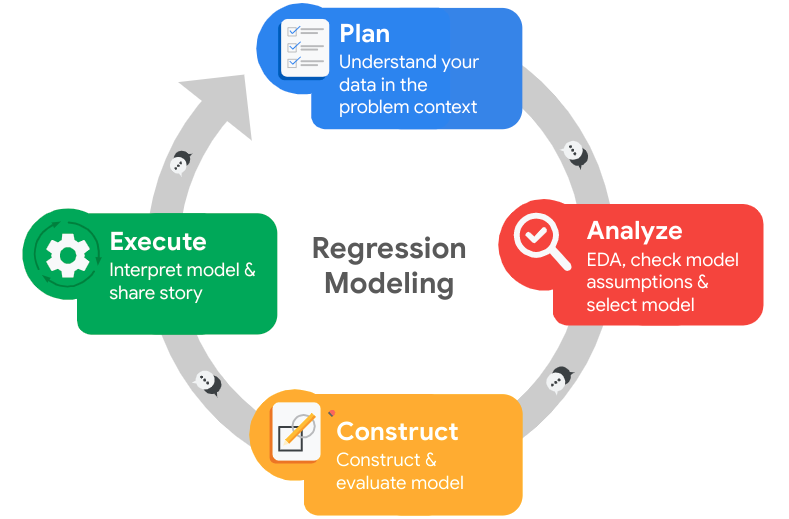

## **Pace: Plan**


### Understanding the business scenario and problem


### The HR dataset

The dataset used in this project contains 15,000 rows and 10 columns for the variables listed below.

**Note:** in order to run this notebook you will have to download 'HR_capstone_dataset.csv' under the data folder on the GitHub repository!

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports



### Import packages

In [34]:
# Import packages
import pandas as pd
import numpy as np

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  

In [35]:
# Load dataset into a dataframe
df0 = pd.read_csv("/content/HR_capstone_dataset.csv")
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and Data Cleaning)





### Gathering preliminary information about the data

In [36]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [37]:
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Gathering descriptive statistics about the data

In [38]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Renaming columns

Standardizing the column names so that they are all in `snake_case`.

In [39]:
# Renaming columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident_bool',
                          'left': 'left_company_bool',
                          'promotion_last_5years':'promo_last5_bool',
                          'Department':'department'})
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident_bool',
       'left_company_bool', 'promo_last5_bool', 'department', 'salary'],
      dtype='object')

### Checking missing values (NaNs)

In [40]:
# Checking for missing values
df0.isna().sum()

satisfaction_level      0
last_evaluation         0
number_project          0
average_montly_hours    0
time_spend_company      0
work_accident_bool      0
left_company_bool       0
promo_last5_bool        0
department              0
salary                  0
dtype: int64

### Checking duplicates

In [41]:
# Check for duplicates
duplicate_rows = df0[df0.duplicated()]
print(duplicate_rows)

       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  work_accident_bool  \
396                     139                   3                   0   
866                     128                   3                   0   
1317                    127               

In [42]:
# Dropping duplicates and saving resulting dataframe in a new variable as needed
df_noDup = df0.drop_duplicates()
df_noDup.shape # a loss of ~3000 entries, might do performance benchmarking between the two sets later

(11991, 10)

In [43]:
df_noDup.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident_bool,left_company_bool,promo_last5_bool,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [46]:
df_noDup.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident_bool',
       'left_company_bool', 'promo_last5_bool', 'department', 'salary'],
      dtype='object')

### One-hot encoding

One-hot encoding `department` and `salary` attributes.

In [45]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, dtype=int)
encoded_data = encoder.fit_transform(df_noDup[['department','salary']])

encoded_columns = encoder.get_feature_names_out(['department','salary'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

clean_df = df_noDup.drop(columns=['department','salary'])
df_encoded = pd.concat([clean_df, encoded_df], axis=1)
df_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident_bool,left_company_bool,promo_last5_bool,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Checking outliers

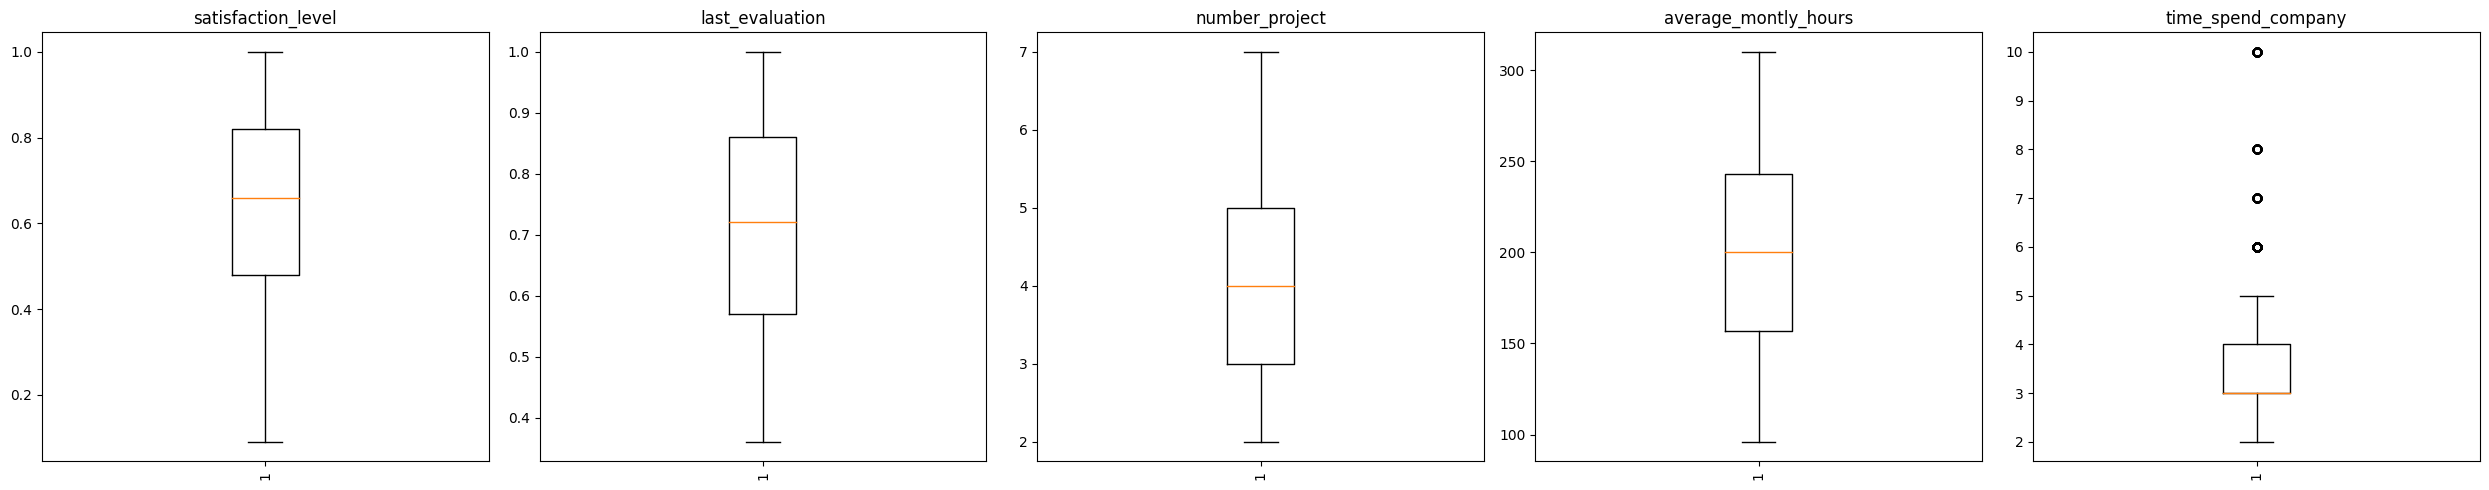

In [47]:
# Creating boxplots
import matplotlib.pyplot as plt


# continuous
df_cont_box = df_encoded[['satisfaction_level', 'last_evaluation',
                                  'number_project','average_montly_hours',
                                  'time_spend_company']]

fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, col in enumerate(df_cont_box.columns):
    axs[i].boxplot(df_cont_box[col].dropna())
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [48]:
# categorical
df_cat_box = df_encoded.drop(columns=['satisfaction_level', 'last_evaluation',
                                  'number_project','average_montly_hours',
                                  'time_spend_company'])

# binary sums
sums = df_cat_box.sum()
# percentages
percentages = (sums / len(df_cat_box)) * 100

summary_df = pd.DataFrame({
    'Sum': sums,
    'Percentage': percentages
})
print(summary_df)

                           Sum  Percentage
work_accident_bool      1850.0   15.416667
left_company_bool       1991.0   16.591667
promo_last5_bool         203.0    1.691667
department_IT            976.0    8.133333
department_RandD         694.0    5.783333
department_accounting    621.0    5.175000
department_hr            601.0    5.008333
department_management    436.0    3.633333
department_marketing     673.0    5.608333
department_product_mng   686.0    5.716667
department_sales        3239.0   26.991667
department_support      1821.0   15.175000
department_technical    2244.0   18.700000
salary_high              990.0    8.250000
salary_low              5740.0   47.833333
salary_medium           5261.0   43.841667


###Insights

*   `time_spend_company` has 4 outliers.
*   15% of employees had workplace accidents
*   **~17% of employees left the company** *(interesting insight for dataset balance)*
*   Only ~2% of employees received a promotion in the past 5 years.
*   **The largest departments are Sales, Support and Technical divisions.**
*  8% of employees are high-salary individuals, with medium and low-salary individuals approximatelt balanced (43% and 47%)




# pAce: Analyze Stage
---
**Performing EDA**

Some questions to investigate:

1.   Does the employees who spent a higher than average time at SM are likely to have a higher `satisfaction_level`?
2.   Which departments suffered the most from being unable to retain employees? What is the percentage divide?
3.   Are certain departments more likely to have employees who work longer hours or have higher last evaluation scores?
4.   Are employees who experienced work accidents are more likely to leave?
5.   Is there a significant difference in last evaluation scores between employees who stayed and those who left?
6.   What are some of the characteristics of employees who left? Are there any recurring and apparent themes that contribute to an employee leaving the company? *High-level question, clustering maybe interesting.*








### Insights

### **Q1:** Does the employees who spent a higher than average time at SM are likely to have a higher `satisfaction_level`?

#### Parametric Tests

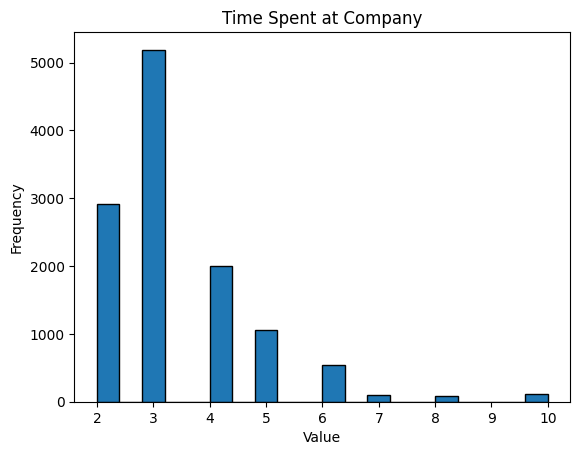

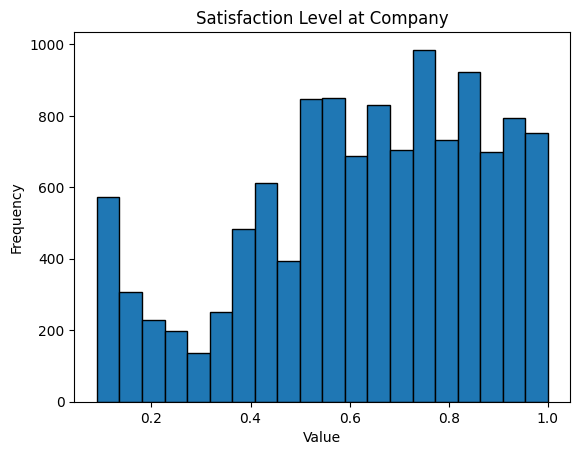

Median of time spent at company: 3.0
Median of satisfaction level at company: 0.66


In [15]:
# Hypothesis Testing
import scipy.stats as stats
import seaborn as sns

# Histogram, need to pick a threshold to seperate the group into two.
plt.hist(df_encoded['time_spend_company'], bins=20, edgecolor='black')
plt.title('Time Spent at Company')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_encoded['satisfaction_level'], bins=20, edgecolor='black')
plt.title('Satisfaction Level at Company')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Getting median for an initial seperation threshold
print('Median of time spent at company:', df_encoded['time_spend_company'].median())
print('Median of satisfaction level at company:', df_encoded['satisfaction_level'].median())

Considering the distributions, it might be better to follow a non-parametric test. I still coded a t-test function below to make sure by checking for normality and homoscedasticity assumptions!

In [16]:
def two_sided_ttest(threshold, df_encoded, sample_size, alpha=0.05, attr_name='time_spend_company'):
  # Threshold
  threshold = threshold
  print('Threshold selected:', threshold)

  # Splitting into two groups
  df_high_time = df_encoded[df_encoded[attr_name] > threshold]
  df_low_time = df_encoded[df_encoded[attr_name] <= threshold]

  # Checking sample sizes in both groups
  print('Sample size of high time:', len(df_high_time))
  print('Sample size of low time:', len(df_low_time))

  # Random sampling to equal out group sizes
  sampled_high_time = df_high_time.sample(n=sample_size, random_state=1)
  sampled_low_time = df_low_time.sample(n=sample_size, random_state=1)

  #--------------------
  print()
  # Normality checks
  print('Normality Checks')
  sns.histplot(sampled_high_time[attr_name], kde=True)
  plt.title('High Time Spent Company Satisfaction Level')
  plt.show()

  sns.histplot(sampled_low_time[attr_name], kde=True)
  plt.title('Low Time Spent Company Satisfaction Level')
  plt.show()

    # Q-Q plots
  stats.probplot(sampled_high_time[attr_name], dist="norm", plot=plt)
  plt.title('Q-Q plot for High Time Spent Company Satisfaction Level')
  plt.show()

  stats.probplot(sampled_low_time[attr_name], dist="norm", plot=plt)
  plt.title('Q-Q plot for Low Time Spent Company Satisfaction Level')
  plt.show()

  # Variance checks (homoscedasticity)
  print()
  print('Variance Checks')
  stat, p = stats.levene(sampled_high_time[attr_name], sampled_low_time[attr_name])
  print(f"Levene's test statistic: {stat}, p-value: {p}")
  if p < 0.05:
    print("The variances are significantly different.")
  else:
    print("The variances are not significantly different.")
  print()
  #--------------------

  mean_group1 = sampled_high_time[attr_name].mean()
  mean_group2 = sampled_low_time[attr_name].mean()

  print(f"Mean satisfaction level for High Time Spent Company (>{threshold} years): {mean_group1}")
  print(f"Mean satisfaction level for Low Time Spent Company (≤{threshold} years): {mean_group2}")

  # two-sample t-test
  t_stat, p_value = stats.ttest_ind(sampled_high_time[attr_name],
                                    sampled_low_time[attr_name])

  print(f"T-statistic: {t_stat}")
  print(f"P-value: {p_value}")

  # Interpretation of results
  alpha = 0.05
  if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in satisfaction levels.")
  else:
    print("Fail to reject the null hypothesis. There is no significant difference in satisfaction levels.")

Threshold selected: 2
Sample size of high time: 9081
Sample size of low time: 2910

Normality Checks


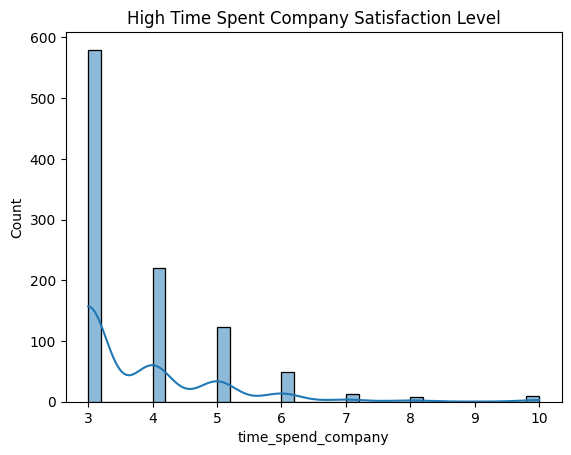

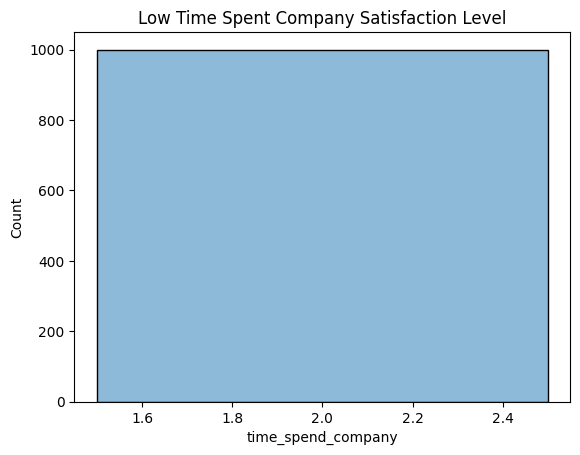

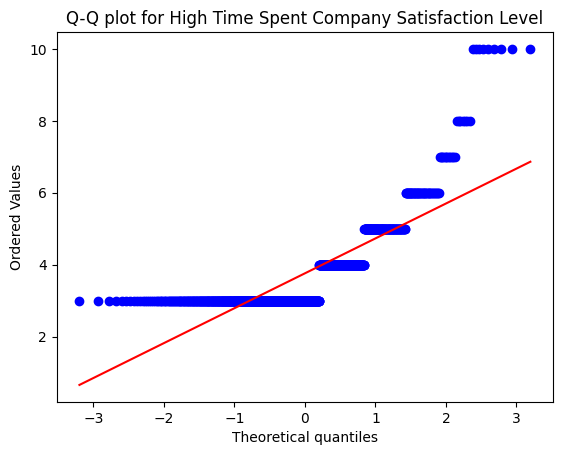

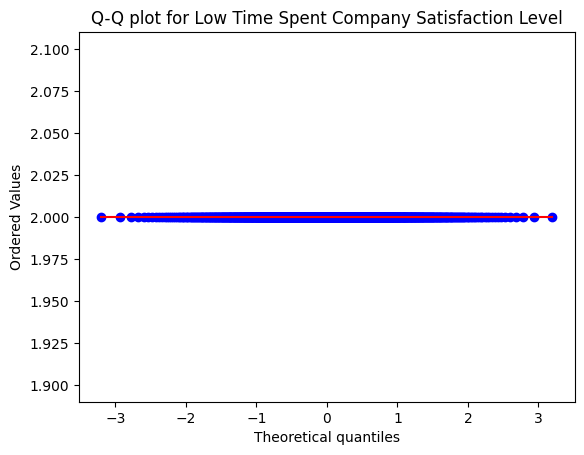


Variance Checks
Levene's test statistic: 415.5513203299253, p-value: 4.50373842436118e-84
The variances are significantly different.

Mean satisfaction level for High Time Spent Company (>2 years): 3.759
Mean satisfaction level for Low Time Spent Company (≤2 years): 2.0
T-statistic: 47.24288345997001
P-value: 0.0
Reject the null hypothesis. There is a significant difference in satisfaction levels.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
# threshold = 2
two_sided_ttest(2, df_encoded, sample_size=1000, alpha=0.05, attr_name='time_spend_company')

Threshold selected: 3
Sample size of high time: 3891
Sample size of low time: 8100

Normality Checks


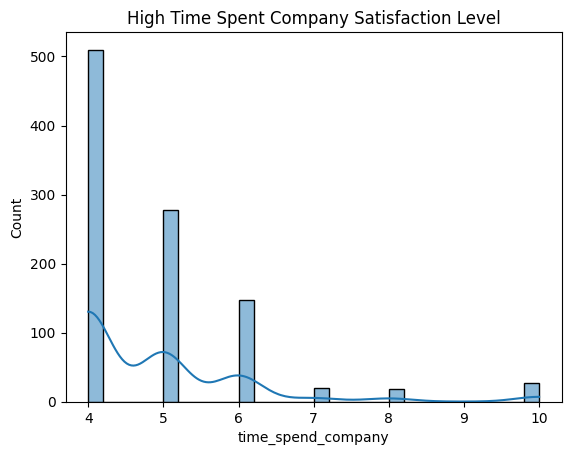

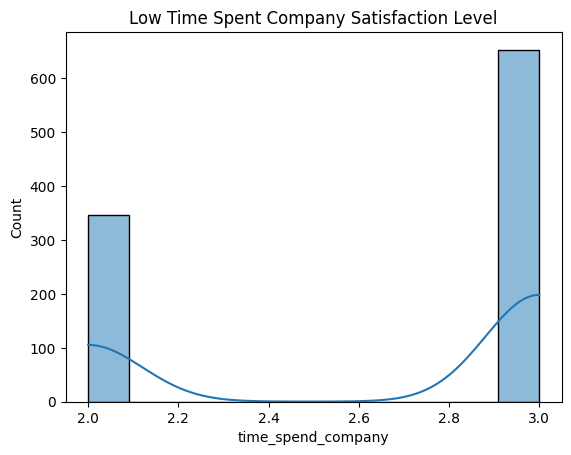

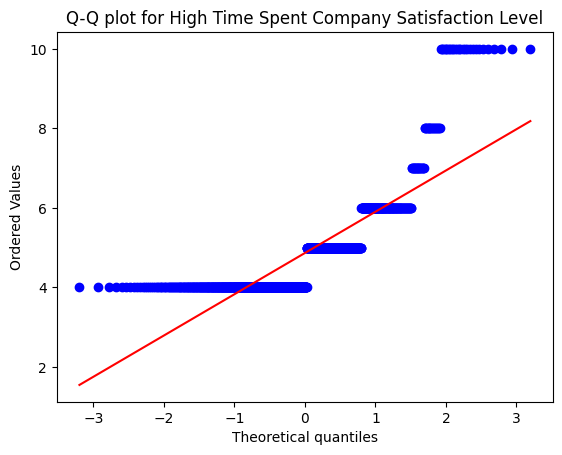

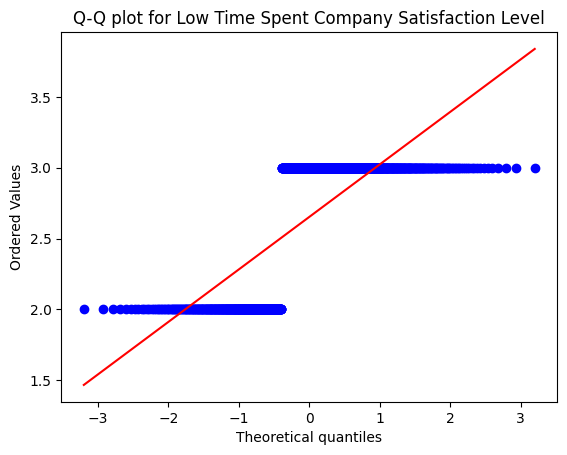


Variance Checks
Levene's test statistic: 150.9516188114785, p-value: 1.6824080852886354e-33
The variances are significantly different.

Mean satisfaction level for High Time Spent Company (>3 years): 4.866
Mean satisfaction level for Low Time Spent Company (≤3 years): 2.653
T-statistic: 52.38813566121239
P-value: 0.0
Reject the null hypothesis. There is a significant difference in satisfaction levels.


In [18]:
# threshold = 3
two_sided_ttest(3, df_encoded, sample_size=1000, alpha=0.05, attr_name='time_spend_company')

#### Non-parametric Tests

Implementing Mann-Whitney U Test.

In [31]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(df,attr_name,threshold,sample_size,alpha=0.05):
  print('Threshold selected:', threshold)

  df_high_time = df_encoded[df_encoded[attr_name] > threshold]
  df_low_time = df_encoded[df_encoded[attr_name] <= threshold]
  print('Sample size of high time:', len(df_high_time))
  print('Sample size of low time:', len(df_low_time))

  # sampling
  sampled_high_time = df_high_time.sample(n=sample_size, random_state=1)
  sampled_low_time = df_low_time.sample(n=sample_size, random_state=1)

  mean_group1 = sampled_high_time[attr_name].mean()
  mean_group2 = sampled_low_time[attr_name].mean()
  mean_all = df[attr_name].mean()
  print(f"Mean satisfaction level for High Time Spent Company (>{threshold} years): {mean_group1}")
  print(f"Mean satisfaction level for Low Time Spent Company (≤{threshold} years): {mean_group2}")
  print(f"Mean satisfaction level for Company (All-inclusive) (≤{threshold} years): {mean_all}")


  stat, p_value = mannwhitneyu(sampled_high_time[attr_name],
                              sampled_low_time[attr_name],
                              alternative='two-sided')
  print(f"Mann-Whitney U test statistic: {stat}, p-value: {p_value}")

  alpha = 0.05
  if p_value < alpha:
      print("Reject the null hypothesis. There is a significant difference between the two groups.")
  else:
      print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")

In [32]:
mann_whitney_u_test(df_encoded,'time_spend_company',2,1000,alpha=0.05)
print()
mann_whitney_u_test(df_encoded,'time_spend_company',3,1000,alpha=0.05)
print()
mann_whitney_u_test(df_encoded,'time_spend_company',5,100,alpha=0.05)
print()

Threshold selected: 2
Sample size of high time: 9081
Sample size of low time: 2910
Mean satisfaction level for High Time Spent Company (>2 years): 3.759
Mean satisfaction level for Low Time Spent Company (≤2 years): 2.0
Mean satisfaction level for Company (All-inclusive) (≤2 years): 3.3648569760653824
Mann-Whitney U test statistic: 1000000.0, p-value: 0.0
Reject the null hypothesis. There is a significant difference between the two groups.

Threshold selected: 3
Sample size of high time: 3891
Sample size of low time: 8100
Mean satisfaction level for High Time Spent Company (>3 years): 4.866
Mean satisfaction level for Low Time Spent Company (≤3 years): 2.653
Mean satisfaction level for Company (All-inclusive) (≤3 years): 3.3648569760653824
Mann-Whitney U test statistic: 1000000.0, p-value: 0.0
Reject the null hypothesis. There is a significant difference between the two groups.

Threshold selected: 5
Sample size of high time: 824
Sample size of low time: 11167
Mean satisfaction level f

**Comments:** According to the hypothesis testing results, if an employee spent more than 3 years at a company, they are likely to have satisfaction levels which are approximately a point above the company average!

### **Q2:** Which departments suffered the most from being unable to retain employees? What is the percentage divide?

In [49]:
# using df_noDup for this question, easier to use groupby
left_per_department = df_noDup[df_noDup['left_company_bool'] == 1].groupby('department').size()
total_per_department = df_noDup.groupby('department').size()

# percentage of employees who left per department
percentage_left_per_department = (left_per_department / total_per_department) * 100
most_affected_department = percentage_left_per_department.idxmax()
most_affected_percentage = percentage_left_per_department.max()

results = pd.DataFrame({
    'total_employees': total_per_department,
    'employees_left': left_per_department,
    'percentage_left': percentage_left_per_department
}).fillna(0).sort_values(by='percentage_left', ascending=False)

print("Percentage of employees who left per department:")
print(results)

print(f"\nDepartment that suffered the most: {most_affected_department}")
print(f"Percentage of employees who left: {most_affected_percentage:.2f}%")

Percentage of employees who left per department:
             total_employees  employees_left  percentage_left
department                                                   
hr                       601             113        18.801997
accounting               621             109        17.552335
technical               2244             390        17.379679
support                 1821             312        17.133443
sales                   3239             550        16.980550
marketing                673             112        16.641902
IT                       976             158        16.188525
product_mng              686             110        16.034985
RandD                    694              85        12.247839
management               436              52        11.926606

Department that suffered the most: hr
Percentage of employees who left: 18.80%


### **Q3:** Are certain departments more likely to have employees who work longer hours or have higher last evaluation scores?

Two part investigation. Let's start with work hours.

In [54]:
average_hours_per_department = df_noDup.groupby('department')['average_montly_hours'].mean()

most_affected_department_hours = average_hours_per_department.idxmax()
highest_average_hours = average_hours_per_department.max()

print("Average work hours per department:")
print(average_hours_per_department)

print(f"\nDepartment with the highest average work hours: {most_affected_department_hours}")
print(f"Highest average work hours: {highest_average_hours:.2f}")

Average work hours per department:
department
IT             200.638320
RandD          201.291066
accounting     200.877617
hr             199.371048
management     201.529817
marketing      199.487370
product_mng    198.893586
sales          200.242050
support        200.627128
technical      201.115419
Name: average_montly_hours, dtype: float64

Department with the highest average work hours: management
Highest average work hours: 201.53


In [56]:
average_lep_per_department = df_noDup.groupby('department')['last_evaluation'].mean()

highest_perf_dep = average_lep_per_department.idxmax()
highest_average_dep = average_lep_per_department.max()

print("Average LEP per department:")
print(average_lep_per_department)

print(f"\nDepartment with the highest average LEP: {highest_perf_dep}")
print(f"Highest average LEP: {highest_average_dep:.2f}")

Average LEP per department:
department
IT             0.715051
RandD          0.712983
accounting     0.721900
hr             0.715691
management     0.726307
marketing      0.718440
product_mng    0.713790
sales          0.710398
support        0.722998
technical      0.719791
Name: last_evaluation, dtype: float64

Department with the highest average LEP: management
Highest average LEP: 0.73


**Comments:** Nothing apparently sticking out of the pack.

### **Q4:** Are employees who experienced work accidents are more likely to leave?

### **Q5:** Is there a significant difference in last evaluation scores between employees who stayed and those who left?

### **Q6:** What are some of the characteristics of employees who left? Are there any recurring and apparent themes that contribute to an employee leaving the company? CLUSTERING.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
### YOUR CODE HERE ###


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.